In [10]:
! pip install tensorflow


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [12]:
main_data_dir = r'C:\Users\DEEPIKA M\OneDrive\Desktop\dsatm\Segmented Medicinal Leaf Images'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 10

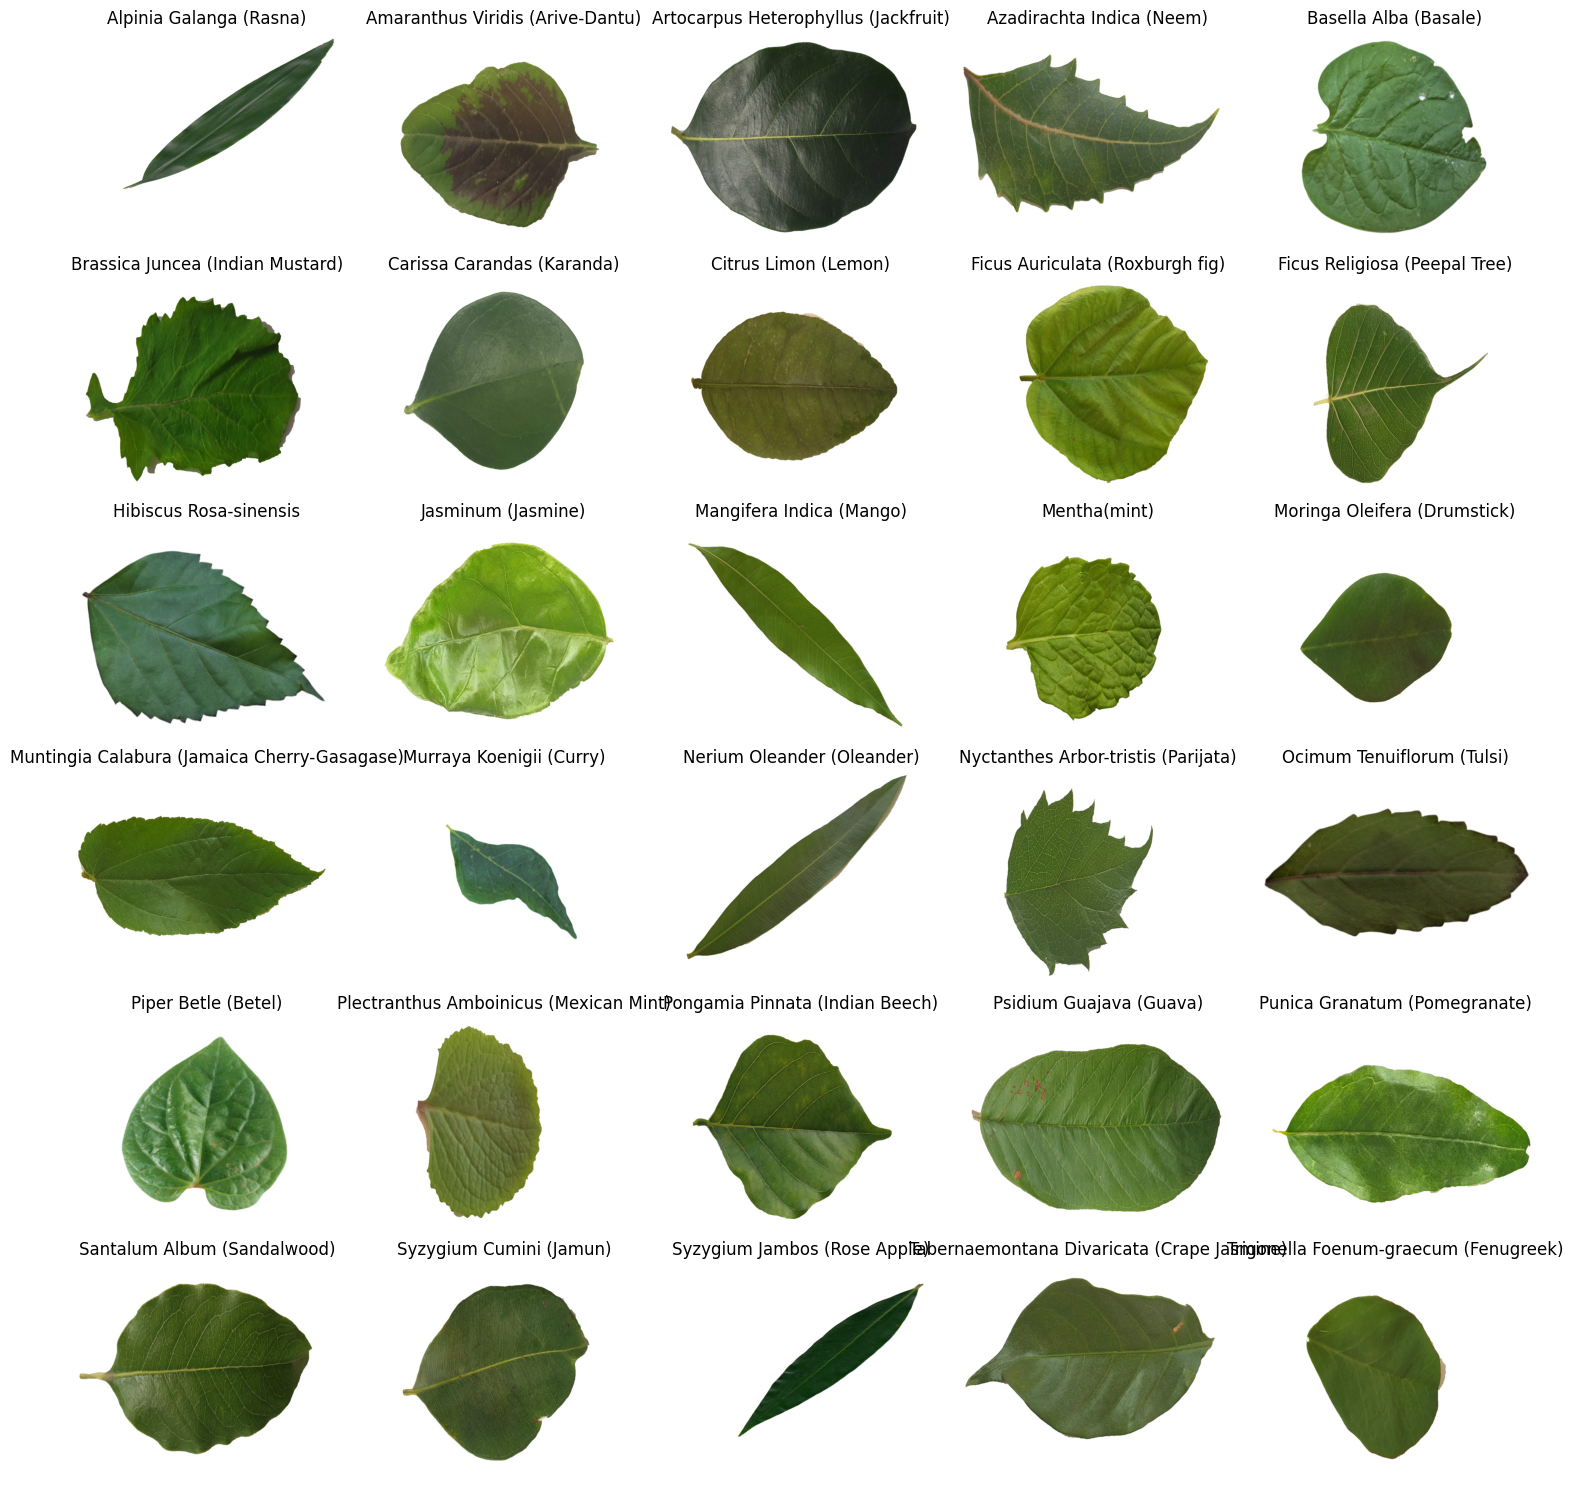

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# List all subdirectories (class folders) in the main directory
class_folders = os.listdir(main_data_dir)

# Set the number of images per row
images_per_row = 5

# Calculate the number of rows needed
num_rows = math.ceil(len(class_folders) / images_per_row)

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 15))

# Display images in rows with titles
for i, class_folder in enumerate(class_folders):
    # Get the first image file in the class folder
    class_folder_path = os.path.join(main_data_dir, class_folder)
    image_files = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg')]
    if image_files:
        first_image_path = os.path.join(class_folder_path, image_files[0])
        
        # Load the image
        img = mpimg.imread(first_image_path)
        
        # Calculate the row and column indices for the subplot
        row = i // images_per_row
        col = i % images_per_row
        
        # Display the image in the corresponding subplot
        axs[row, col].imshow(img)
        axs[row, col].set_title(class_folder)
        axs[row, col].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [14]:
# Split ratio between training and validation data
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import math

main_data_dir = r'C:\Users\DEEPIKA M\OneDrive\Desktop\dsatm\Segmented Medicinal Leaf Images'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))  # Count the number of classes (subdirectories)
epochs = 10
split_ratio = 0.8

# Create ImageDataGenerator with data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio
)


In [15]:
# Load and preprocess training data using the generator
train_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

# Load and preprocess validation data using the generator
validation_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 1488 images belonging to 30 classes.
Found 350 images belonging to 30 classes.


In [16]:
# Unfreeze some layers for fine-tuning
from tensorflow.keras.applications import MobileNetV2 # Example import

# Assuming you are using ResNet50 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False)
for layer in base_model.layers[-20:]:
    layer.trainable = True


C:\Users\DEEPIKA M\AppData\Local\Temp\ipykernel_4192\2846754526.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [17]:
!pip install scipy



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
x = Dropout(0.5)(x)  # Adding dropout for regularization


NameError: name 'Dropout' is not defined

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

Found 1485 images belonging to 30 classes.
Found 350 images belonging to 30 classes.
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 660ms/step - accuracy: 0.3099 - loss: 2.7049 - val_accuracy: 0.8500 - val_loss: 0.6586
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7500 - loss: 0.8487 - val_accuracy: 0.7000 - val_loss: 0.8135
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 609ms/step - accuracy: 0.7711 - loss: 0.7045 - val_accuracy: 0.8750 - val_loss: 0.4164
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8125 - loss: 0.7736 - val_accuracy: 0.8000 - val_loss: 0.7225
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 598ms/step - accuracy: 0.8697 - loss: 0.4291 - val_accuracy: 0.9000 - val_loss: 0.3116
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9062 - loss: 0.2178 - val_accuracy: 0.9667 - val_loss: 0.2507
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 596ms/step - accuracy: 0.8909 - loss: 0.3538 - val_accuracy: 0.9062 - val_loss: 0.2744
Epoch 8/10
46/46 ━

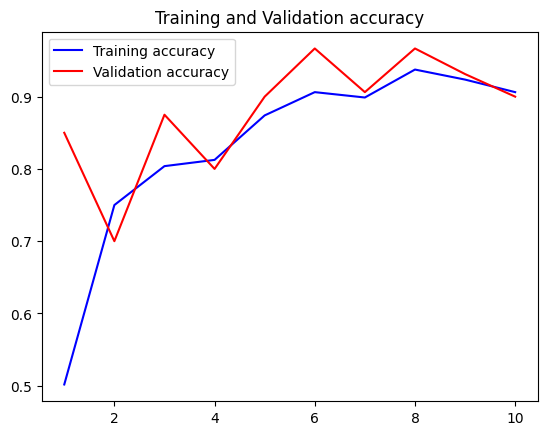

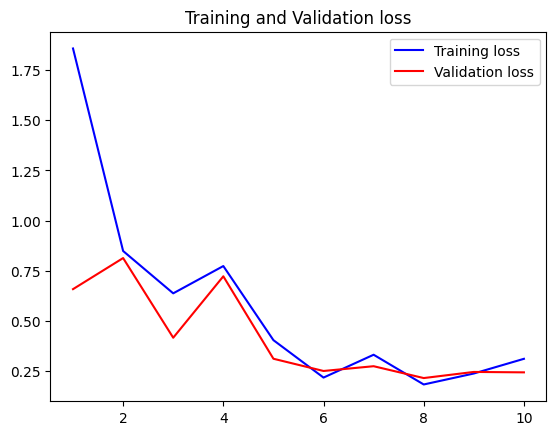

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Assuming these variables are defined earlier in your script or notebook
main_data_dir = r'C:\Users\DEEPIKA M\OneDrive\Desktop\dsatm\Segmented Medicinal Leaf Images'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))  # Count the number of classes (subdirectories)
epochs = 10
split_ratio = 0.8

# Create ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio  # Set validation split
)

# Assuming you have a 'train' and 'validation' subdirectory in main_data_dir
train_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

validation_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the correct optimizer setup
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



In [ ]:
score,accuracy = model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 13s/step - accuracy: 0.9611 - loss: 0.1632
Test score is 0.17055584490299225
Test accuracy is 0.9569482207298279


In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('plant_identification_model.h5')

Classes = ['Alpinia Galanga (Rasna)',
           'Amaranthus Viridis (Arive-Dantu)',
           'Artocarpus Heterophyllus (Jackfruit)',
           'Azadirachta Indica (Neem)',
           'Basella Alba (Basale)',
           'Brassica Juncea (Indian Mustard)',
           'Carissa Carandas (Karanda)',
           'Citrus Limon (Lemon)',
           'Ficus Auriculata (Roxburgh fig)',
           'Ficus Religiosa (Peepal Tree)',
           'Hibiscus Rosa-sinensis',
           'Jasminum (Jasmine)',
           'Mangifera Indica (Mango)',
           'Mentha (Mint)',
           'Moringa Oleifera (Drumstick)',
           'Muntingia Calabura (Jamaica Cherry-Gasagase)',
           'Murraya Koenigii (Curry)',
           'Nerium Oleander (Oleander)',
           'Nyctanthes Arbor-tristis (Parijata)',
           'Ocimum Tenuiflorum (Tulsi)',
           'Piper Betle (Betel)',
           'Plectranthus Amboinicus (Mexican Mint)',
           'Pongamia Pinnata (Indian Beech)',
           'Psidium Guajava (Guava)',
           'Punica Granatum (Pomegranate)',
           'Santalum Album (Sandalwood)',
           'Syzygium Cumini (Jamun)',
           'Syzygium Jambos (Rose Apple)',
           'Tabernaemontana Divaricata (Crape Jasmine)',
           'Trigonella Foenum-graecum (Fenugreek)']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define your model architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Replace num_classes with your number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 84, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 82, 82, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 23104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    11,829,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,929,470 (45.51 MB)

 Trainable params: 11,929,470 (45.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define your model architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Replace num_classes with your number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_generator.class_indices

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha(mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tabe

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_8', 'max_pooling2d_8', 'conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'flatten_2', 'dense_18', 'dropout_10', 'dense_19', 'dense_20']


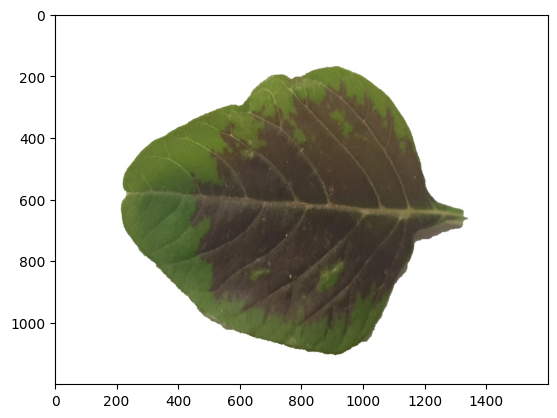

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img1 = load_img(
    "C:\\Users\\DEEPIKA M\\OneDrive\\Desktop\\dsatm\\Segmented Medicinal Leaf Images\\Amaranthus Viridis (Arive-Dantu)//AV-S-001.jpg")
plt.imshow(img1)

# Preprocess image
img1 = load_img(
    "C:\\Users\\DEEPIKA M\\OneDrive\\Desktop\\dsatm\\Segmented Medicinal Leaf Images\\Amaranthus Viridis (Arive-Dantu)//AV-S-001.jpg", target_size=(256, 256))
img = img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)
# "D:\Docs\Smart India Hackathon\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Alpinia Galanga (Rasna)"


In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =512

train_generator =train_datagen.flow_from_directory(main_data_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=train_datagen.flow_from_directory(main_data_dir,shuffle=True, target_size=(img_width,img_height), batch_size=batch_size)

Found 1835 images belonging to 30 classes.
Found 1835 images belonging to 30 classes.


In [ ]:
# Import Libraries
from tensorflow.keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
model.save('plant_identification_model.h5')